In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### The two worlds of Matplotlib  There are two broad ways of using matplotlib's pyplot:   
 
1. The first (and most common) way is not pythonic. It relies on global functions to build and display a global figure using matplotlib as a global state machine. (This is easy for interactive use).  
 
2. The second way is pythonic and object oriented and it is the best approach for programmatic use: a. obtain an empty Figure from a global factory, then build the plot using the methods of the Figure and Axes classes; or b. obtain a populated Axes (and its Figure container) using a plot method from the pandas data analysis library, which you can then pretty-up and save to file. 

## Using matplotlib as a global state machine

In [2]:
np.random.seed(0)
# f = D (date wise) , M (month wise)
x = pd.period_range('1980-01-01',periods=450,freq='M')
#x.to_timestamp().to_pydatetime()
x = x.to_timestamp().to_pydatetime()
y = np.random.randn(len(x)).cumsum()

C:\Users\GirrajJangid\Anaconda3\envs\python_gpu\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


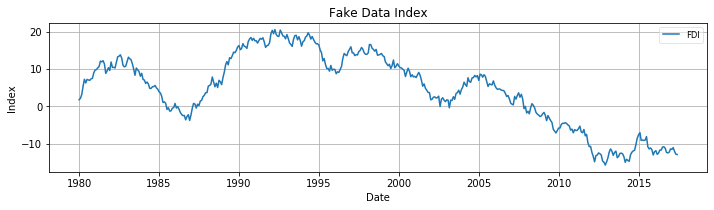

In [3]:
# preety up the plotting
plt.plot(x,y,label='FDI')
# plt.gcf() ==> getCurrentFigure()
plt.gcf().set_size_inches(10,3) # new thing
plt.title('Fake Data Index')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True) # default is also true
plt.legend(loc='best',framealpha=0.5,
          prop={'size':'small'})
plt.tight_layout(pad=1)

In [4]:
plt.savefig('filename.png')
plt.close()

### Introducing the figure and axes classes

The Figure Figure is the top-level container for everything on a canvas. It was obtained from the global Figure factory. 

num – integer or string identifier of figure       
        if num exists, it is selected       
        if num is None, a new one is allocated 
        
figsize – tuple of (width, height) in inches 
dpi – dots per inch 

facecolor – background 

edgecolor – border 

In [5]:
# iterative over the open figures
for i in plt.get_fignums():
    fig = plt.figure(i) # get the figure
    print(fig.number) # do something

In [6]:
plt.close(fig.number) # close figure
plt.close()        # close the current figure 
plt.close(i)       # close figure numbered i 
plt.close(name)    # close figure by str name
plt.close('all')   # close all figure

NameError: name 'fig' is not defined

An Axes or Subplot (a subclass of Axes) An Axes is a container class for a specific plot. A figure may contain many Axes and/or Subplots. Subplots are laid out in a grid within the Figure. Axes can be placed anywhere on the Figure. There are a number of methods that yield an Axes, including: ax 

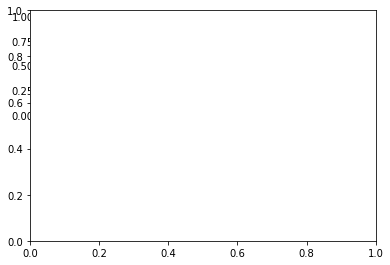

In [7]:
fig = plt.figure(num = 1)
ax = fig.add_subplot(2,2,1) # row-col-num
ax = fig.add_axes([0.1,0.1,0.8,0.8])

In [8]:
# iterating the axes within a figure
for ax in fig.get_axes():
    pass # do something

# from an axes get its figure
fig = ax.figure

# remove an axes from a figure
fig.delaxes(ax)

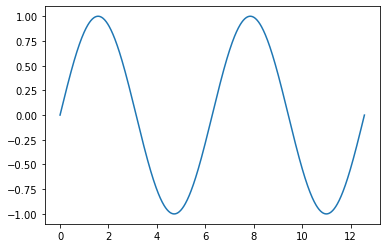

In [9]:
x = np.linspace(0, 4*np.pi, 800) 
y = np.sin(x) 
plt.plot(x,y)
plt.show()

#### Build a line plot with matplotlib and raw (x,y) data

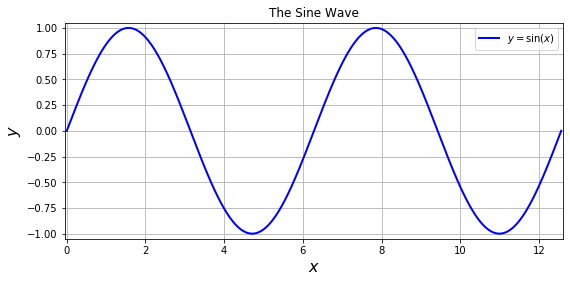

In [10]:
#fake up some data 
x = np.linspace(0, 4*np.pi, 800) 
y = np.sin(x) 
  
#get an empty Figure and add an Axes 
fig = plt.figure(figsize=(8,4)) 
ax = fig.add_subplot(1,1,1) # row-col-num 
 
#line plot data on the Axes 
ax.plot(x, y, 'b-', linewidth=2, label=r'$y=\sin(x)$') 
 
#add title and axis labels 
ax.set_title('The Sine Wave') 
ax.set_ylabel(r'$y$', fontsize=16)  
ax.set_xlabel(r'$x$', fontsize=16) 
 
#change the default plot limits 
ax.set_xlim((-0.05, 4*np.pi + 0.05,)) 
ax.set_ylim((-1.05, 1.05)) 
 
#plot a legend in the best location 
ax.legend(loc='best') 
 
#add grid – not in default classic style 
ax.grid(True) 
 
#improve the layout 
fig.tight_layout(pad=1) 
 

### Build a multi-line plot from raw data in matplotlib

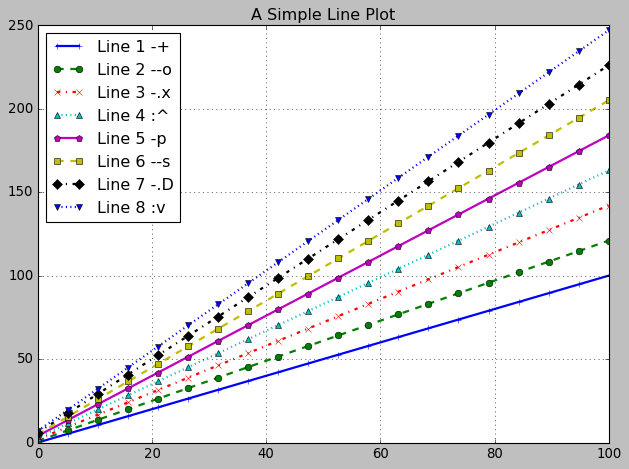

In [11]:
#select a style 
plt.style.use('classic') 
 
#get the Figure and Axes all at once 
fig, ax = plt.subplots(figsize=(8,6)) 
 
#plot some lines 
N = 8 # the number of lines we will plot 
styles =  ['-', '--', '-.', ':'] 
markers = list('+ox^psDv') 
x = np.linspace(0, 100, 20) 
for i in range(N): # add line-by-line
    y = x + x/5*i + i
    s = styles[i % len(styles)]
    m = markers[i % len(markers)]
    ax.plot(x, y,
            label='Line '+str(i+1)+' '+s+m,
            marker=m, linewidth=2, linestyle=s) 

#add grid, legend, title and save 
ax.grid(True) 
ax.legend(loc='best', prop={'size':'large'}) 
ax.set_title('A Simple Line Plot') 
fig.tight_layout(pad=1) 
fig.savefig('filename.png', dpi=125) 
plt.show()
#plt.close('all') 
 
 

### Scatter plotting

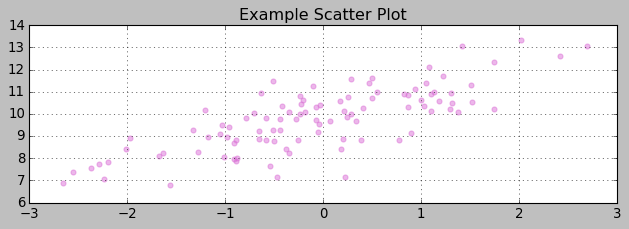

In [12]:
x = np.random.randn(100) 
y = x + np.random.randn(100) + 10 
plt.style.use('classic') 
fig, ax = plt.subplots(figsize=(8, 3)) 
ax.scatter(x, y, alpha=0.5, color='orchid') 
ax.set_title('Example Scatter Plot') 
ax.grid(True) 
fig.tight_layout(pad=1) 
fig.savefig('filename1.png', dpi=125)

#### Add the prediction interval for the regression line

In [14]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [15]:
import statsmodels.api as sm 
from scipy import stats 

x = sm.add_constant(x) # intercept 
# Model: y ~ x + c 
model = sm.OLS(y, x) 
fitted = model.fit()
x_pred = np.linspace(x.min(), x.max(), 50) 
x_pred2 = sm.add_constant(x_pred)
y_pred = fitted.predict(x_pred2) 
ax.plot(x_pred, y_pred, '-',
        color='darkorchid', linewidth=2) 

y_hat = fitted.predict(x) 
y_err = y - y_hat 
mean_x = x.T[1].mean() 
n = len(x) 
dof = n - fitted.df_model - 1 

t = stats.t.ppf(1-0.025, df=dof) # 2-tail 
s_err = np.sum(np.power(y_err, 2)) 
conf = t * np.sqrt((s_err/(n-2))*(1.0/n +
            (np.power((x_pred-mean_x),2)/
            ((np.sum(np.power(x_pred,2))) -
             n*(np.power(mean_x,2)))))) 

upper = y_pred + abs(conf) 
lower = y_pred - abs(conf) 
ax.fill_between(x_pred, lower, upper,
                color='#888888', alpha=0.3)

sdev, lower, upper = wls_prediction_std(fitted,
                                        exog=x_pred2,
                                        alpha=0.05)
ax.fill_between(x_pred, lower, upper,
                color='#888888', alpha=0.1) 


### Example of line chart in three different ways

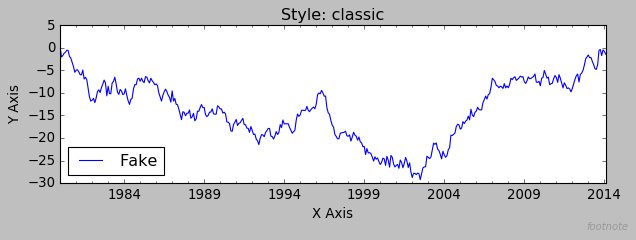

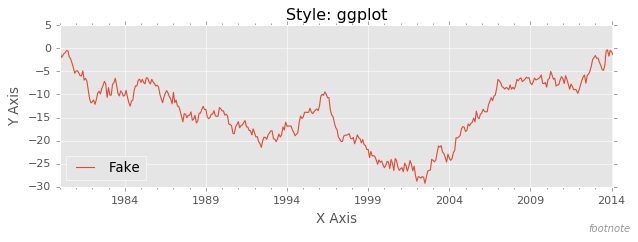

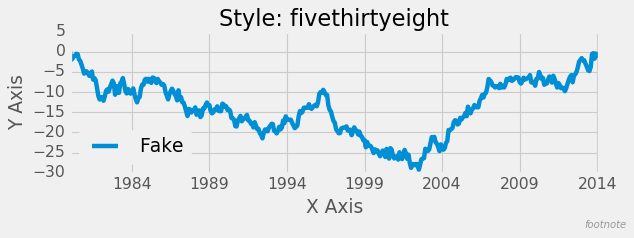

In [16]:
#fake up some data 
x = pd.period_range('1980-01-01',
                    periods=410, freq='M')
y = np.random.randn(len(x)).cumsum()
df = pd.DataFrame(y, index=x,
                  columns=['Fake'])  
 
#plot data using different styles 
styles = ['classic', 'ggplot',
          'fivethirtyeight']
for style in styles:
    plt.style.use(style)
    ax = df.plot()
    ax.set_title('Style: ' + style)
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    fig = ax.figure
    fig.set_size_inches(8, 3)
    fig.tight_layout(pad=1)
    fig.text(0.99, 0.01, 'footnote',
             ha='right', va='bottom',
             fontsize=9, fontstyle='italic',
             color='#999999')